In [3]:
import sys
sys.path.append('/home/lui3si/src/benchmark_ws/src/bosch_arch_tracing/tracetools/src/')
import tracing.trace_pandas as tp
import pandas as pd
import numpy as np
from tracing.ros_mapping import map_roscpp
from tracing.analysis import *
from pandas.tseries.offsets import Milli, Second
from  tracing.analysis import *

%matplotlib notebook

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import pickle


In [2]:
up = pickle.Unpickler(open("../auto-20170728-152607.pickle", "rb"))
data=up.load()


In [3]:
trace_data = map_roscpp(data)
p_data     = tp.ti2pd(trace_data)

In [26]:
p_data.invocations.merge(p_data.functions, how="outer").groupby("function_name").agg([np.mean, np.std])["duration"].sort_values("mean", ascending=False)

,mean,std
function_name,,
tf::MessageFilter<LaserScan >::incomingMessage,207932.093140,402628.518532
"message_filters::Connection message_filters::SimpleFilter<LaserScan >::registerCallback<boost::_bi::bind_t<void, boost::_mfi::mf3<void, costmap_2d::ObstacleLayer, boost::shared_ptr<LaserScan const> const&, boost::shared_ptr<costmap_2d::ObservationBuffer> const&, boost::shared_ptr<tf::MessageFilterBase> const&>, boost::_bi::list4<boost::_bi::value<costmap_2d::ObstacleLayer*>, boost::arg<1>, boost::_bi::value<boost::shared_ptr<costmap_2d::ObservationBuffer> >, boost::_bi::value<boost::shared_ptr<tf::MessageFilter<LaserScan > > > > > >",106464.259761,45375.945943
boost::shared_ptr<message_filters::CallbackHelper1<LaserScan > > message_filters::Signal1<LaserScan >::addCallback<boost::shared_ptr<LaserScan const> const&>,34136.871290,51179.473488
"message_filters::Connection message_filters::SimpleFilter<LaserScan >::registerCallback<boost::_bi::bind_t<void, void",8021.960969,5891.506418
costmap_2d::LayeredCostmap::updateCallback,3470.025819,2216.425822
"message_filters::Connection message_filters::SimpleFilter<LaserScan >::registerCallback<boost::_bi::bind_t<void, boost::_mfi::mf0<void, costmap_2d::LayeredCostmap>, boost::_bi::list1<boost::_bi::value<costmap_2d::LayeredCostmap*> > > >",3470.025819,2216.425822
Rosout::rosoutCallback,NaN,NaN
actionlib::ActionServerBase<beg_bod_msgs::BaseManeuverApproachObjectAction >::cancelCallback,NaN,NaN
actionlib::ActionServerBase<beg_bod_msgs::BaseManeuverApproachObjectAction >::goalCallback,NaN,NaN


In [43]:
p_data.functions.merge(p_data.tasks).query("function_name=='move_base::MoveBase::executeCycle'")

,callback,function_name,task_id,node,task_name
100,139696617635104,move_base::MoveBase::executeCycle,25002,move_base,SingleThreadedSpinner::spin_move_base_node


In [48]:
p_data.invocations.query('callback=="139696617635104"')["duration"].agg([np.mean, np.std])/1e6

mean    29.719527
std      4.276708
Name: duration, dtype: float64

In [38]:
p_data.tasks.query("node=='move_base'")

,node,task_id,task_name
25002,move_base,25002,SingleThreadedSpinner::spin_move_base_node


In [89]:
up = pickle.Unpickler(open("../auto-20170731-114353.pickle", "rb"))
data2=up.load()

In [90]:
td2 = map_roscpp(data2)
pd2 = tp.ti2pd(td2)

FnKey(pid=31506, cb=140241570266864)


In [137]:
fns=list(pd2.functions["function_name"])
[f for f in fns if "move_base" in f]

['move_base::MoveBase::executeCycle',
 'move_base::MoveBase::goalCB',
 'actionlib::ActionServerBase<move_base_msgs::RecoveryAction >::goalCallback',
 'actionlib::ActionServerBase<move_base_msgs::RecoveryAction >::cancelCallback',
 'actionlib::ActionServerBase<move_base_msgs::MoveBaseAction >::goalCallback',
 'actionlib::ActionServerBase<move_base_msgs::MoveBaseAction >::cancelCallback',
 'actionlib::ActionServerBase<move_base_msgs::ObstacleMonitorAction >::goalCallback',
 'actionlib::ActionServerBase<move_base_msgs::ObstacleMonitorAction >::cancelCallback']

In [138]:
cbs = pd.Series(data=[index for index, row in pd2.functions.iterrows() if ("move_base::" in row["function_name"] or "costmap_2d" in row["function_name"]) and "message_filters" not in row["function_name"]]).unique()
pd2.functions.loc[cbs]

callback  \
31506 140241593744512  140241593744512   
      30674944                30674944   
      30705296                30705296   
      140241115076496  140241115076496   
      140241115076496  140241115076496   
      140241115080016  140241115080016   
      140241115080016  140241115080016   
      30283376                30283376   
      30283376                30283376   
      140241114815776  140241114815776   
      140241114815776  140241114815776   
      140241114772896  140241114772896   
      140241114772896  140241114772896   
      140241114666256  140241114666256   
      140241114666256  140241114666256   
      140241114666256  140241114666256   
      140241114666256  140241114666256   
      140241114669328  140241114669328   
      140241114669328  140241114669328   
      140241114669328  140241114669328   
      140241114669328  140241114669328   
      30625920                30625920   
      140241570266864  140241570266864   
      140241570266864  140241570266864   
      33968272                33968272   
      33968272                33968272   
      33974320                33974320   

                                                           function_name  \
31506 140241593744512                  move_base::MoveBase::executeCycle   
      30674944                               move_base::MoveBase::goalCB   
      30705296                      costmap_2d::StaticLayer::incomingMap   
      140241115076496              costmap_2d::StaticLayer::updateBounds   
      140241115076496              costmap_2d::StaticLayer::updateBounds   
      140241115080016               costmap_2d::StaticLayer::updateCosts   
      140241115080016               costmap_2d::StaticLayer::updateCosts   
      30283376                costmap_2d::LayeredCostmap::updateCallback   
      30283376         message_filters::Connection message_filters::S...   
      140241114815776            costmap_2d::ObstacleLayer::updateBounds   
      140241114815776            costmap_2d::ObstacleLayer::updateBounds   
      140241114772896             costmap_2d::ObstacleLayer::updateCosts   
      140241114772896             costmap_2d::ObstacleLayer::updateCosts   
      140241114666256           costmap_2d::InflationLayer::updateBounds   
      140241114666256           costmap_2d::InflationLayer::updateBounds   
      140241114666256           costmap_2d::InflationLayer::updateBounds   
      140241114666256           costmap_2d::InflationLayer::updateBounds   
      140241114669328            costmap_2d::InflationLayer::updateCosts   
      140241114669328            costmap_2d::InflationLayer::updateCosts   
      140241114669328            costmap_2d::InflationLayer::updateCosts   
      140241114669328            costmap_2d::InflationLayer::updateCosts   
      30625920         costmap_2d::Costmap2DROS::setUnpaddedRobotFoot...   
      140241570266864                costmap_2d::Costmap2DROS::updateMap   
      140241570266864                costmap_2d::Costmap2DROS::updateMap   
      33968272                costmap_2d::LayeredCostmap::updateCallback   
      33968272         message_filters::Connection message_filters::S...   
      33974320         costmap_2d::Costmap2DROS::setUnpaddedRobotFoot...   

                       task_id  
31506 140241593744512    31506  
      30674944           31506  
      30705296           31506  
      140241115076496    31506  
      140241115076496    31506  
      140241115080016    31506  
      140241115080016    31506  
      30283376           31506  
      30283376           31506  
      140241114815776    31506  
      140241114815776    31506  
      140241114772896    31506  
      140241114772896    31506  
      140241114666256    31506  
      140241114666256    31506  
      140241114666256    31506  
      140241114666256    31506  
      140241114669328    31506  
      140241114669328    31506  
      140241114669328    31506  
      140241114669328    31506 

In [162]:
from matplotlib import cm

In [268]:
def fn_durations(data):
    cbs = pd.Series(data=[index for index, row in data.functions.\
                            iterrows() if ("move_base::" in row["function_name"] or \
                                           "costmap_2d" in row["function_name"] or
                                           "mayfield_planner" in row["function_name"]) and \
                          "message_filters" not in row["function_name"]]).unique()
    data.functions.loc[cbs]
    return data.functions.loc[cbs].merge(data.invocations, on='callback').\
        loc[:,("function_name", "duration", "cycles")].groupby('function_name').agg([np.median, np.std]).\
        sort_values(by=('duration', 'median'), ascending=False)/1e6
fn_durations(pd2)

duration             \
                                                       median        std   
function_name                                                              
move_base::MoveBase::executeCycle                   29.935998   4.339756   
costmap_2d::Costmap2DROS::updateMap                  2.524391  10.130948   
costmap_2d::InflationLayer::updateCosts              1.176663  14.605306   
costmap_2d::ObstacleLayer::updateBounds              0.206924   0.120518   
costmap_2d::ObstacleLayer::updateCosts               0.043583   0.182570   
costmap_2d::StaticLayer::updateCosts                 0.041002   0.371905   
costmap_2d::StaticLayer::updateBounds                0.006044   0.002072   
costmap_2d::LayeredCostmap::updateCallback           0.003338   0.002877   
message_filters::Connection message_filters::Si...   0.003338   0.002877   

                                                       cycles             
                                                       median        std  
function_name                                                             
move_base::MoveBase::executeCycle                   78.528507  11.994037  
costmap_2d::Costmap2DROS::updateMap                  4.686740  33.796730  
costmap_2d::InflationLayer::updateCosts              2.400855  48.645453  
costmap_2d::ObstacleLayer::updateBounds              0.364959   0.065232  
costmap_2d::ObstacleLayer::updateCosts               0.074391   0.201035  
costmap_2d::StaticLayer::updateCosts                 0.093850   0.383289  
costmap_2d::StaticLayer::updateBounds                0.007743   0.005037  
costmap_2d::LayeredCostmap::updateCallback           0.005503   0.001078  
message_filters::Connection message_filters::Si...   0.005503   0.001078

In [263]:
up = pickle.Unpickler(open("../auto-20170731-141243.pickle", "rb"))
data3=up.load()
td3 = map_roscpp(data3)
pd3 = tp.ti2pd(td3)

FnKey(pid=27758, cb=139939682148080)
FnKey(pid=27758, cb=139939367911696)
FnKey(pid=27758, cb=139939682148080)
FnKey(pid=27758, cb=139939367911696)
FnKey(pid=27758, cb=139939682148080)
FnKey(pid=27758, cb=139939682148080)
FnKey(pid=27758, cb=139939682148080)
FnKey(pid=27758, cb=139939682148080)
FnKey(pid=27758, cb=139939682148080)
FnKey(pid=27758, cb=139939682148080)
FnKey(pid=27758, cb=139939682148080)
FnKey(pid=27758, cb=139939682148080)


In [265]:
fns=list(pd3.functions["function_name"])
fns.sort()
[f for f in fns if "anner" in f]

['mayfield_planner::MayfieldPlannerROS::computeVelocityCommands']

In [269]:
fn_durations(pd3)

duration             \
                                                       median        std   
function_name                                                              
move_base::MoveBase::executeCycle                   30.174412   3.928653   
mayfield_planner::MayfieldPlannerROS::computeVe...  25.496166   3.094242   
costmap_2d::Costmap2DROS::updateMap                  1.987567  10.455732   
costmap_2d::InflationLayer::updateCosts              1.098611  14.958852   
costmap_2d::ObstacleLayer::updateBounds              0.178612   0.109089   
costmap_2d::StaticLayer::updateCosts                 0.061278   0.351965   
costmap_2d::ObstacleLayer::updateCosts               0.037401   0.170579   
costmap_2d::StaticLayer::updateBounds                0.009796        NaN   
costmap_2d::LayeredCostmap::updateCallback           0.003035   0.002320   
message_filters::Connection message_filters::Si...   0.003035   0.002320   

                                                       cycles               
                                                       median          std  
function_name                                                               
move_base::MoveBase::executeCycle                   78.852537    10.486673  
mayfield_planner::MayfieldPlannerROS::computeVe...  72.752904     7.906514  
costmap_2d::Costmap2DROS::updateMap                  4.675860  1082.871039  
costmap_2d::InflationLayer::updateCosts              2.420997    48.659071  
costmap_2d::ObstacleLayer::updateBounds              0.360407     0.056377  
costmap_2d::StaticLayer::updateCosts                 0.077742     0.421243  
costmap_2d::ObstacleLayer::updateCosts               0.074820     0.215529  
costmap_2d::StaticLayer::updateBounds                0.018545          NaN  
costmap_2d::LayeredCostmap::updateCallback           0.005423     0.001136  
message_filters::Connection message_filters::Si...   0.005423     0.001136

In [99]:
pd2.invocations.query("callback==140241114772896")

,callback,cycles,duration,node,starts,task_id
2017-07-31 09:44:00.296516294,140241114772896,3357540,2153291,move_base_node,2017-07-31 09:44:00.296516294,1032
2017-07-31 09:44:01.299076566,140241114772896,3216519,3013068,move_base_node,2017-07-31 09:44:01.299076566,1032
2017-07-31 09:44:02.293621755,140241114772896,131999,109767,move_base_node,2017-07-31 09:44:02.293621755,1032
2017-07-31 09:44:03.293482820,140241114772896,133433,78450,move_base_node,2017-07-31 09:44:03.293482820,1032
2017-07-31 09:44:04.293594768,140241114772896,132032,109932,move_base_node,2017-07-31 09:44:04.293594768,1032
2017-07-31 09:44:05.293420857,140241114772896,143913,89913,move_base_node,2017-07-31 09:44:05.293420857,1032
2017-07-31 09:44:06.293487934,140241114772896,143631,95715,move_base_node,2017-07-31 09:44:06.293487934,1032
2017-07-31 09:44:07.293616546,140241114772896,133485,111148,move_base_node,2017-07-31 09:44:07.293616546,1032
2017-07-31 09:44:08.293617272,140241114772896,134692,103400,move_base_node,2017-07-31 09:44:08.293617272,1032
2017-07-31 09:44:09.293408926,140241114772896,133313,78372,move_base_node,2017-07-31 09:44:09.293408926,1032


In [100]:
pd2.functions.query("callback==140241114772896")

callback  \
31506 140241114772896  140241114772896   
      140241114772896  140241114772896   

                                                function_name  task_id  
31506 140241114772896  costmap_2d::ObstacleLayer::updateCosts    31506  
      140241114772896  costmap_2d::ObstacleLayer::updateCosts    31506

In [2]:
pd3=load_as_pd("../auto-20170731-141243.pd.pickle")

In [6]:
def fn_durations(fi_pd, stats=[np.sum, np.median, np.std], sort_key=("duration", "sum")):
    """Compute median and standard deviation of aggregated invocation data."""
    return fi_pd.groupby('function_name').agg(stats).\
        sort_values(by=sort_key, ascending=False)

In [7]:
fn_durations(select_invocations(pd3))/1e6

duration             \
                                                             sum     median   
function_name                                                                 
move_base::MoveBase::executeCycle                   14972.615284  30.174412   
mayfield_planner::MayfieldPlannerROS::computeVe...  12652.333994  25.496166   
costmap_2d::Costmap2DROS::updateMap                  6622.778972   1.987567   
costmap_2d::InflationLayer::updateCosts              4902.061420   1.098611   
tf::MessageFilter<LaserScan >::incomingMessage        970.566590   0.018748   
boost::shared_ptr<message_filters::CallbackHelp...    738.582373   0.006969   
costmap_2d::ObstacleLayer::updateBounds               453.725456   0.178612   
message_filters::Connection message_filters::Si...    327.455367   0.097511   
costmap_2d::ObstacleLayer::updateCosts                120.399110   0.037401   
message_filters::Connection message_filters::Si...     51.512607   0.007180   
costmap_2d::LayeredCostmap::updateCallback             10.623304   0.003035   
message_filters::Connection message_filters::Si...     10.623304   0.003035   
costmap_2d::StaticLayer::updateCosts                   10.100814   0.061278   
costmap_2d::StaticLayer::updateBounds                   0.009796   0.009796   

                                                                      cycles  \
                                                          std            sum   
function_name                                                                  
move_base::MoveBase::executeCycle                    3.928653   39520.978641   
mayfield_planner::MayfieldPlannerROS::computeVe...   3.094242   35834.917914   
costmap_2d::Costmap2DROS::updateMap                 10.455732 -164994.423236   
costmap_2d::InflationLayer::updateCosts             14.958852   10737.821626   
tf::MessageFilter<LaserScan >::incomingMessage       0.244866    1575.902306   
boost::shared_ptr<message_filters::CallbackHelp...   0.050241    1246.178660   
costmap_2d::ObstacleLayer::updateBounds              0.109089     815.849864   
message_filters::Connection message_filters::Si...   0.043568     551.663027   
costmap_2d::ObstacleLayer::updateCosts               0.170579     199.889480   
message_filters::Connection message_filters::Si...   0.007965      85.855502   
costmap_2d::LayeredCostmap::updateCallback           0.002320      17.710654   
message_filters::Connection message_filters::Si...   0.002320      17.710654   
costmap_2d::StaticLayer::updateCosts                 0.351965      12.738866   
costmap_2d::StaticLayer::updateBounds                     NaN       0.018545   

                                                                            
                                                       median          std  
function_name                                                               
move_base::MoveBase::executeCycle                   78.852537    10.486673  
mayfield_planner::MayfieldPlannerROS::computeVe...  72.752904     7.906514  
costmap_2d::Costmap2DROS::updateMap                  4.675860  1082.871039  
costmap_2d::InflationLayer::updateCosts              2.420997    48.659071  
tf::MessageFilter<LaserScan >::incomingMessage       0.035014     0.356034  
boost::shared_ptr<message_filters::CallbackHelp...   0.012352     0.076683  
costmap_2d::ObstacleLayer::updateBounds              0.360407     0.056377  
message_filters::Connection message_filters::Si...   0.175009     0.030763  
costmap_2d::ObstacleLayer::updateCosts               0.074820     0.215529  
message_filters::Connection message_filters::Si...   0.013553     0.004032  
costmap_2d::LayeredCostmap::updateCallback           0.005423     0.001136  
message_filters::Connection message_filters::Si...   0.005423     0.001136  
costmap_2d::StaticLayer::updateCosts                 0.077742     0.421243  
costmap_2d::StaticLayer::updateBounds                0.018545          NaN

In [8]:
pd3.invocations

,callback,cycles,duration,node,starts,task_id
2017-07-31 12:12:50.563488456,139939368318864,18545,9796,move_base_node,2017-07-31 12:12:50.563488456,29759
2017-07-31 12:12:50.563536130,139939368058144,64162,30669,move_base_node,2017-07-31 12:12:50.563536130,29759
2017-07-31 12:12:50.564882807,139939368322384,1725939,1045434,move_base_node,2017-07-31 12:12:50.564882807,29759
2017-07-31 12:12:50.567228944,139939368015264,3431467,2320233,move_base_node,2017-07-31 12:12:50.567228944,29759
2017-07-31 12:12:50.927695379,139939367911696,1147446622,358962446,move_base_node,2017-07-31 12:12:50.927695379,29759
2017-07-31 12:12:51.005843133,24645168,13328,5379,move_base,2017-07-31 12:12:51.005843133,27758
2017-07-31 12:12:51.005845637,24645120,29547,11859,move_base,2017-07-31 12:12:51.005845637,27758
2017-07-31 12:12:51.006408368,24646064,8170,3247,move_base,2017-07-31 12:12:51.006408368,27758
2017-07-31 12:12:51.006409007,24646560,12567,5083,move_base,2017-07-31 12:12:51.006409007,27758
2017-07-31 12:12:51.006657669,24645264,508020,245177,move_base,2017-07-31 12:12:51.006657669,27758


In [13]:
pd4=load_as_pd("../auto-20170801-072822.pd.pickle")

In [14]:
pd4.invocations.query("trace_id > 0")

,callback,cycles,duration,node,starts,task_id,trace_id
2017-08-01 05:28:29.821933944,139912855971488,19655,43854,move_base_node,2017-08-01 05:28:29.821933944,3424,139912492883984
2017-08-01 05:28:29.821974608,139912855711072,58542,26699,move_base_node,2017-08-01 05:28:29.821974608,3424,139912492883984
2017-08-01 05:28:29.823015149,139912855975440,1638039,762595,move_base_node,2017-08-01 05:28:29.823015149,3424,139912492883984
2017-08-01 05:28:29.824595194,139912855668160,3392753,1574219,move_base_node,2017-08-01 05:28:29.824595194,3424,139912492883984
2017-08-01 05:28:30.178649627,139912855564592,1147804664,352625080,move_base_node,2017-08-01 05:28:30.178649627,3424,139912492883984
2017-08-01 05:28:30.241418454,43059248,14333,5353,move_base,2017-08-01 05:28:30.241418454,1163,1501565309911880382
2017-08-01 05:28:30.241420898,43046064,32910,12236,move_base,2017-08-01 05:28:30.241420898,1163,1501565309911880382
2017-08-01 05:28:30.241938863,42599808,7757,4730,move_base,2017-08-01 05:28:30.241938863,1163,1501565309911880382
2017-08-01 05:28:30.241939494,42599760,12328,6184,move_base,2017-08-01 05:28:30.241939494,1163,1501565309911880382
2017-08-01 05:28:30.242150869,43059888,516446,210446,move_base,2017-08-01 05:28:30.242150869,1163,1501565309911880382


In [43]:
def s_invocations(pd_df, fn_selector=lambda _: True):
    """Merges invocations and functions table, and returns all function invocations where the function_name 
        is selected by the given selector function (default: all)"""
    cbs = pd.Series(data=[index for index, row in pd_df.functions.\
                            iterrows() if fn_selector(row["function_name"])]).unique()
    return pd_df.functions.loc[cbs].merge(pd_df.invocations, on='callback')

def g_durations(fi_pd, stats=['count', np.sum, np.median, np.std], sort_key=("duration", "sum"), fields=("duration", "cycles")):
    """Compute median and standard deviation of aggregated invocation data."""
    return fi_pd.loc[:,("function_name", "trace_id") + fields].\
        groupby(('function_name', 'trace_id')).agg(stats).\
        sort_values(by=sort_key, ascending=False)

In [44]:
data=g_durations(s_invocations(pd4))/1e6
data.loc[:,(('duration', 'count'))]*=1e6
data

duration  \
                                                                          count   
function_name                                      trace_id                       
beg_bod_robot_c::139716561209568                   0                        1.0   
move_base_node::139913203771248                    0                        2.0   
move_base::MoveBase::executeCycle                  0                      504.0   
mayfield_planner::MayfieldPlannerROS::computeVe... 0                      500.0   
costmap_2d::Costmap2DROS::updateMap                0                     2074.0   
move_base::139912317767168                         0                    23148.0   
laser_simulator::139775013030880                   0                     6982.0   
move_base_node::139913180278512                    0                     1037.0   
costmap_2d::InflationLayer::updateCosts            46377088              1996.0   
                                                   139912492883984         80.0   
beg_bod_rom_com::23434112                          0                        1.0   
move_base::43045680                                0                     1533.0   
control_panel_n::10482304                          0                        1.0   
field_monitorin::8598864                           0                        1.0   
move_base::46316608                                0                     1532.0   
base_maneuver_n::139923726272736                   0                    15078.0   
drive_permit_no::140605619439840                   0                    26450.0   
simulator_node::140396642438656                    0                    10905.0   
costmap_2d::ObstacleLayer::updateBounds            46377088              2004.0   
eci_driver_node::140689908173024                   0                     3668.0   
field_managemen::9002976                           0                        1.0   
simulator_node::140396642437344                    0                     7178.0   
move_base::139912317766624                         0                     1437.0   
eci_driver_node::140689908174224                   0                     1790.0   
field_monitorin::8628448                           0                     6289.0   
throttle::11843808                                 0                     6176.0   
simulator_node::140396642438112                    0                     3982.0   
beg_bod_simulat::31698176                          0                     4765.0   
laser_simulator::23966928                          0                     4765.0   
path_control::8137008                              0                     4723.0   
...                                                                         ...   
message_filters::Connection message_filters::Si... 1501565371077993066      2.0   
costmap_2d::LayeredCostmap::updateCallback         1501565371077993066      2.0   
message_filters::Connection message_filters::Si... 1501565369479076219      2.0   
costmap_2d::LayeredCostmap::updateCallback         1501565369479076219      2.0   
                                                   1501565348304036567      2.0   
message_filters::Connection message_filters::Si... 1501565348304036567      2.0   
costmap_2d::LayeredCostmap::updateCallback         1501565338108030240      2.0   
message_filters::Connection message_filters::Si... 1501565338108030240      2.0   
costmap_2d::LayeredCostmap::updateCallback         1501565362113056670      2.0   
message_filters::Connection message_filters::Si... 1501565362113056670      2.0   
costmap_2d::LayeredCostmap::updateCallback         1501565371036964742      2.0   
message_filters::Connection message_filters::Si... 1501565371036964742      2.0   
costmap_2d::LayeredCostmap::updateCallback         1501565367109130372      2.0   
message_filters::Connection message_filters::Si... 1501565367109130372      2.0   
                                                   1501565363503071843      2.0   
cost

In [95]:
pd5=load_as_pd("../auto-20170801-130830.pd.pickle")

In [96]:
data=g_durations(s_invocations(pd5))/1e6
data.loc[:,(('duration', 'count'))]*=1e6
data

duration  \
                                                                      count   
function_name                                      trace_id                   
move_base::MoveBase::executeCycle                  0                  502.0   
mayfield_planner::MayfieldPlannerROS::computeVe... 0                  498.0   
costmap_2d::Costmap2DROS::updateMap                14399744          1000.0   
                                                   140114453520400    126.0   
costmap_2d::InflationLayer::updateCosts            140114453520400    126.0   
                                                   14399744          1000.0   
move_base_node::140114893676272                    14399744           500.0   
                                                   140114453520400     63.0   
tf::MessageFilter<LaserScan >::incomingMessage     14333864          3102.0   
                                                   7287616           3102.0   
costmap_2d::ObstacleLayer::updateBounds            14399744          1000.0   
tf::MessageFilter<LaserScan >::incomingMessage     10014952          3106.0   
                                                   11076944          3106.0   
boost::shared_ptr<message_filters::CallbackHelp... 10021688          3104.0   
message_filters::Connection message_filters::Si... 10021688          1552.0   
boost::shared_ptr<message_filters::CallbackHelp... 10018672          1552.0   
                                                   14334680          3100.0   
message_filters::Connection message_filters::Si... 14334680          1550.0   
boost::shared_ptr<message_filters::CallbackHelp... 14335920          1550.0   
costmap_2d::ObstacleLayer::updateCosts             14399744          1000.0   
costmap_2d::ObstacleLayer::updateBounds            140114453520400    126.0   
costmap_2d::ObstacleLayer::updateCosts             140114453520400    126.0   
message_filters::Connection message_filters::Si... 10021688          1552.0   
                                                   10014952          1553.0   
boost::shared_ptr<message_filters::CallbackHelp... 10014952          1553.0   
message_filters::Connection message_filters::Si... 14334680          1550.0   
                                                   14333864          1551.0   
boost::shared_ptr<message_filters::CallbackHelp... 14333864          1551.0   
                                                   10019552          1552.0   
                                                   10017984          1553.0   
                                                   14376848          1550.0   
                                                   14164928          1551.0   
message_filters::Connection message_filters::Si... 10021688          1552.0   
costmap_2d::LayeredCostmap::updateCallback         10021688          1552.0   
message_filters::Connection message_filters::Si... 14334680          1550.0   
costmap_2d::LayeredCostmap::updateCallback         14334680          1550.0   
costmap_2d::StaticLayer::updateCosts               140114453520400     63.0   
boost::shared_ptr<message_filters::CallbackHelp... 10019696          1552.0   
                                                   14336016          1550.0   
costmap_2d::StaticLayer::updateBounds              140114453520400      1.0   

                                                                                  \
                                                                             sum   
function_name                                      trace_id                        
move_base::MoveBase::executeCycle                  0                13381.497773   
mayfield_planner::MayfieldPlannerROS::computeVe... 0                11868.406363   
costmap_2d::Costmap2DROS::updateMap                14399744          2033.260330   
                                                   140114453520400   1861.580618   
costmap_2d::InflationLayer::updateCosts            140114453520400   1787.573204 

In [97]:
fns=[]
means=[]
e_means=[]
stds=[]
e_stds=[]
for a, b in s_invocations(pd5).groupby(("function_name", "trace_id")):
    starts = b["starts"]
    durations = pd.to_timedelta(b["duration"])
    ends = starts + durations
    periods=starts - starts.shift(1)
    e_periods = ends - ends.shift(1)
    fns.append(a)
    means.append(periods.mean())
    e_means.append(e_periods.mean())
    stds.append(periods.std())
    e_stds.append(e_periods.std())

pd.DataFrame(data={'function_name': fns, 'period mean': means, 'period std': stds,
                    'end mean': e_means, 'end std': e_stds}).\
    sort_values(by='end std', ascending=False)
    

,end mean,end std,function_name,period mean,period std
19,00:00:00.496003,00:00:05.634931,"(costmap_2d::ObstacleLayer::updateBounds, 1401...",00:00:00.496001,00:00:05.634912
21,00:00:00.495974,00:00:05.634605,"(costmap_2d::ObstacleLayer::updateCosts, 14011...",00:00:00.495985,00:00:05.634730
15,00:00:00.489997,00:00:05.567161,"(costmap_2d::InflationLayer::updateCosts, 1401...",00:00:00.492988,00:00:05.600794
13,00:00:00.489976,00:00:05.566925,"(costmap_2d::Costmap2DROS::updateMap, 14011445...",00:00:00.492988,00:00:05.600793
18,00:00:00.050400,00:00:01.596340,"(costmap_2d::ObstacleLayer::updateBounds, 1439...",00:00:00.050400,00:00:01.596341
20,00:00:00.050400,00:00:01.596332,"(costmap_2d::ObstacleLayer::updateCosts, 14399...",00:00:00.050400,00:00:01.596332
14,00:00:00.050399,00:00:01.596304,"(costmap_2d::InflationLayer::updateCosts, 1439...",00:00:00.050400,00:00:01.596318
12,00:00:00.050399,00:00:01.596295,"(costmap_2d::Costmap2DROS::updateMap, 14399744)",00:00:00.050400,00:00:01.596318
8,00:00:00.019922,00:00:01.109770,(boost::shared_ptr<message_filters::CallbackHe...,00:00:00.019922,00:00:01.109771
36,00:00:00.019909,00:00:01.109433,(tf::MessageFilter<LaserScan >::incomingMessag...,00:00:00.019909,00:00:01.109432


In [105]:
s_invocations(pd5).groupby(("function_name", "trace_id")).agg(lambda x: (x - x.shift(1)).mean()).sort_values(by="starts").loc[:,("duration", "starts")]

duration  \
function_name                                      trace_id                        
tf::MessageFilter<LaserScan >::incomingMessage     11076944        -2.103037e+02   
                                                   10014952        -2.101636e+02   
boost::shared_ptr<message_filters::CallbackHelp... 10021688         1.880245e+01   
tf::MessageFilter<LaserScan >::incomingMessage     14333864         2.078426e+01   
                                                   7287616          2.145243e+01   
boost::shared_ptr<message_filters::CallbackHelp... 14334680         2.399968e+01   
message_filters::Connection message_filters::Si... 10014952        -1.484536e+00   
boost::shared_ptr<message_filters::CallbackHelp... 10014952        -1.484536e+00   
                                                   10017984         3.195876e-01   
                                                   10019696        -8.671825e-01   
message_filters::Connection message_filters::Si... 10021688        -1.063830e+00   
costmap_2d::LayeredCostmap::updateCallback         10021688        -1.063830e+00   
message_filters::Connection message_filters::Si... 10021688        -1.323301e+02   
boost::shared_ptr<message_filters::CallbackHelp... 10018672        -1.320587e+02   
message_filters::Connection message_filters::Si... 10021688         1.145068e+00   
boost::shared_ptr<message_filters::CallbackHelp... 10019552         1.112186e+00   
                                                   14333864         1.738710e+00   
message_filters::Connection message_filters::Si... 14333864         1.738710e+00   
boost::shared_ptr<message_filters::CallbackHelp... 14164928         1.409677e+00   
message_filters::Connection message_filters::Si... 14334680        -4.881214e+00   
boost::shared_ptr<message_filters::CallbackHelp... 14335920        -5.130407e+00   
costmap_2d::LayeredCostmap::updateCallback         14334680         1.013557e-01   
message_filters::Connection message_filters::Si... 14334680         1.013557e-01   
boost::shared_ptr<message_filters::CallbackHelp... 14336016        -2.123951e-01   
                                                   14376848         1.648806e+00   
message_filters::Connection message_filters::Si... 14334680         2.233054e+00   
costmap_2d::Costmap2DROS::updateMap                14399744        -7.615696e+02   
costmap_2d::InflationLayer::updateCosts            14399744        -4.508999e+02   
costmap_2d::ObstacleLayer::updateCosts             14399744        -1.537437e+01   
costmap_2d::ObstacleLayer::updateBounds            14399744        -1.889990e+01   
move_base::MoveBase::executeCycle                  0                1.162455e+02   
move_base_node::140114893676272                    14399744        -1.524665e+03   
mayfield_planner::MayfieldPlannerROS::computeVe... 0               -4.384795e+04   
costmap_2d::Costmap2DROS::updateMap                140114453520400 -3.012167e+06   
costmap_2d::InflationLayer::updateCosts            140114453520400 -2.991171e+06   
costmap_2d::ObstacleLayer::updateCosts             140114453520400 -1.094354e+04   
costmap_2d::ObstacleLayer::updateBounds            140114453520400  1.659168e+03   
move_base_node::140114893676272                    140114453520400 -6.072918e+06   
costmap_2d::StaticLayer::updateCosts               140114453520400 -6.880355e+03   
costmap_2d::StaticLayer::updateBounds              140114453520400           NaN   

                                                                            starts  
function_name                                      trace_id                         
tf::MessageFilter<LaserScan >::incomingMessage     11076944        00:00:00.019884  
                                                   10014952        00:00:00.019884  
boost::shared_ptr<message_filters::CallbackHelp... 10021688        00:00:00.019896  
tf::MessageFilter<LaserScan >::incomingMessage     14333864        00:00:00.019909  
                                 

In [106]:
s_invocations(pd5).query("function_name=='costmap_2d::Costmap2DROS::updateMap' and trace_id=='14399744'")

,callback,function_name,task_id_x,cycles,duration,node,starts,task_id_y,trace_id
32459,140114893676272,costmap_2d::Costmap2DROS::updateMap,3175,5238156,1630249,move_base_node,2017-08-01 11:08:48.752674197,4521,14399744
32460,140114893676272,costmap_2d::Costmap2DROS::updateMap,3175,3755065,1140037,move_base_node,2017-08-01 11:08:48.852267096,4521,14399744
32461,140114893676272,costmap_2d::Costmap2DROS::updateMap,3175,4490257,1501129,move_base_node,2017-08-01 11:08:48.952601437,4521,14399744
32462,140114893676272,costmap_2d::Costmap2DROS::updateMap,3175,-122408656,2297624,move_base_node,2017-08-01 11:08:49.053409989,4521,14399744
32463,140114893676272,costmap_2d::Costmap2DROS::updateMap,3175,178421736,1405145,move_base_node,2017-08-01 11:08:49.152486622,4521,14399744
32465,140114893676272,costmap_2d::Costmap2DROS::updateMap,3175,5036903,1480261,move_base_node,2017-08-01 11:08:49.252560849,4521,14399744
32466,140114893676272,costmap_2d::Costmap2DROS::updateMap,3175,290382338,1138508,move_base_node,2017-08-01 11:08:49.352233274,4521,14399744
32467,140114893676272,costmap_2d::Costmap2DROS::updateMap,3175,341882015,1412605,move_base_node,2017-08-01 11:08:49.452487734,4521,14399744
32468,140114893676272,costmap_2d::Costmap2DROS::updateMap,3175,396165471,1781958,move_base_node,2017-08-01 11:08:49.552886591,4521,14399744
32469,140114893676272,costmap_2d::Costmap2DROS::updateMap,3175,3828754,1119684,move_base_node,2017-08-01 11:08:49.652214808,4521,14399744


In [9]:
pd6=load_as_pd("../auto-20170802-163128.pd.pickle")

In [136]:
pd6.actions

,action,duration,result,starts
0,move_base,00:00:37.700086,True,2017-08-02 12:45:50.566301952
1,move_base,00:00:40.300197,True,2017-08-02 12:46:28.777749248


<IPython.core.display.Javascript object>


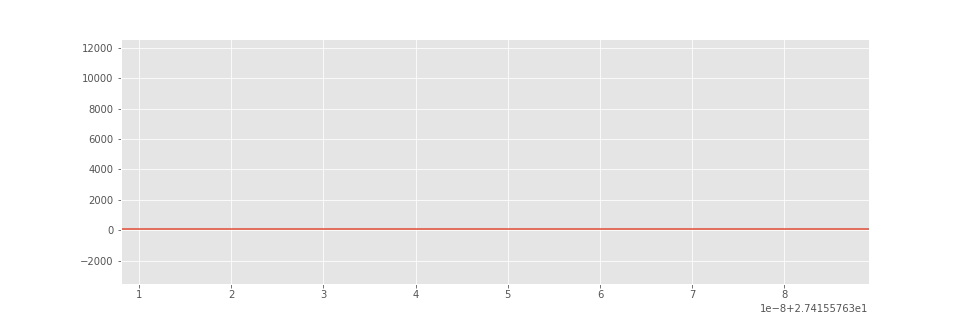

In [12]:
starts=s_invocations(pd6)[0].query("function_name=='move_base::MoveBase::executeCycle'")["starts"]
((starts-starts.shift(1)).astype(np.int64)/1e6).plot()

In [4]:
import time

def s_invocations(pd_df, fn_selector=lambda _: True):
    """Merges invocations and functions table, and returns all function invocations where the function_name 
        is selected by the given selector function (default: all)"""
    cbs = pd.Series(data=[index for index, row in pd_df.functions.\
                            iterrows() if fn_selector(row["function_name"])]).unique()
    if len(pd_df.actions) > 0:
        invs=[]
        for name, a in pd_df.actions.iterrows():
            start = a.starts
            invocations = pd_df.invocations[start:start+a.duration]
            invs.append(pd_df.functions.loc[cbs].merge(invocations, on='callback'))
        return invs
    return pd_df.functions.loc[cbs].merge(pd_df.invocations, on='callback')

def g_durations(fi_pd, stats=['count', np.sum, np.median, np.std], sort_key=("duration", "sum"), fields=("duration", "cycles")):
    """Compute median and standard deviation of aggregated invocation data."""
    return fi_pd.loc[:,("function_name", "trace_id") + fields].\
        groupby(('function_name', 'trace_id')).agg(stats).\
        sort_values(by=sort_key, ascending=False)
        
g_durations(s_invocations(pd6)[1])/1e6

NameError: name 'pd6' is not defined

In [142]:
s_invocations(pd6)[0].groupby(("function_name", "trace_id")).agg(lambda x: (x - x.shift(1)).mean()).loc[:,("duration", "starts")]

duration  \
function_name                                      trace_id                         
boost::shared_ptr<message_filters::CallbackHelp... 37641584             57.180467   
                                                   37649656             65.505040   
                                                   38653360              5.277070   
                                                   38653768              6.970276   
                                                   38656992              2.397028   
                                                   38657088              6.954352   
                                                   40687296             32.886412   
                                                   40687344              2.039278   
                                                   40687576             75.378780   
                                                   41902896              0.061571   
                                                   41915920              1.350318   
                                                   41918632              0.315287   
costmap_2d::Costmap2DROS::updateMap                41979584           -682.674635   
                                                   140057450205200 -165051.640000   
costmap_2d::InflationLayer::updateCosts            41979584           -677.840637   
                                                   140057450205200 -129752.920000   
costmap_2d::LayeredCostmap::updateCallback         37649656              5.892781   
                                                   40687576              4.922505   
costmap_2d::ObstacleLayer::updateBounds            41979584             59.527224   
                                                   140057450205200    3310.640000   
costmap_2d::ObstacleLayer::updateCosts             41979584             30.472776   
                                                   140057450205200  -16120.613333   
costmap_2d::StaticLayer::updateCosts               140057450205200  -15075.837838   
mayfield_planner::MayfieldPlannerROS::computeVe... 0                -76470.205333   
message_filters::Connection message_filters::Si... 37649656              5.892781   
                                                   40687576              4.922505   
message_filters::Connection message_filters::Si... 37649656             59.902335   
                                                   40687576             74.998938   
message_filters::Connection message_filters::Si... 37649656             10.083864   
                                                   38653768              6.970276   
                                                   40687576              4.195329   
                                                   41918632              0.315287   
move_base::MoveBase::executeCycle                  0                  8901.486702   
move_base_node::140058116771568                    41979584          -1367.164894   
                                                   140057450205200 -334564.135135   
tf::MessageFilter<LaserScan >::incomingMessage     34882432              0.056233   
                                                   38653768             29.692308   
                                                   38656256              3.942175   
                                                   41918632              0.906631   

                                                                            starts  
function_name                                      trace_id                         
boost::shared_ptr<message_filters::CallbackHelp... 37641584        00:00:00.040000  
                                                   37649656        00:00:00.019989  
                                                   38653360        00:00:00.039989  
                                                   38653768        00:00:00.039989  
                                                   38656992        00:00:00.0

In [104]:
pd7=load_as_pd("../auto-20170803-100522.pd.pickle") 
pd7.actions

,action,duration,result,starts
0,move_base,00:00:37.400051,True,2017-08-03 08:05:39.712431104


In [105]:
#len(pd7.functions["function_name"].unique()), len(pd7.invocations["callback"].unique())
pd7.invocations["callback"].unique()

array([140066959181104, 140066958921056, 140066959185056, 140066958878144,
       140066958774576, 140067415113456,        35188592,        35188688,
              35190496,        35192272,        35585520,        35585472,
              35192176,        35190848, 140066959131104,        35587536,
              38850096,        38839136,        38828432,        38828384,
              38828144,        38827728,        38867504,        38828192,
              37630976, 140067438591104, 140066453556864])

In [107]:
import tracing.analysis
invs=tracing.analysis.select_invocations(pd7)
len(invs[0]["function_name"].unique())

14

In [7]:
tracing.analysis.fn_durations(invs[0])/1e6

duration  \
                                                                       count   
function_name                                      trace_id                    
move_base::MoveBase::executeCycle                  0                0.000318   
mayfield_planner::MayfieldPlannerROS::computeVe... 0                0.000316   
costmap_2d::Costmap2DROS::updateMap                38915520         0.000638   
move_base_node::140067415113456                    38915520         0.000319   
costmap_2d::InflationLayer::updateCosts            38915520         0.000640   
                                                   140066949840912  0.000068   
costmap_2d::Costmap2DROS::updateMap                140066949840912  0.000066   
tf::MessageFilter<LaserScan >::incomingMessage     38854840         0.001514   
                                                   37630976         0.001514   
costmap_2d::ObstacleLayer::updateBounds            38915520         0.000638   
tf::MessageFilter<LaserScan >::incomingMessage     35188024         0.001516   
                                                   35587536         0.001516   
move_base_node::140067415113456                    140066949840912  0.000033   
boost::shared_ptr<message_filters::CallbackHelp... 35194312         0.001514   
                                                   38865704         0.001526   
message_filters::Connection message_filters::Si... 35194312         0.000757   
                                                   38865704         0.000763   
boost::shared_ptr<message_filters::CallbackHelp... 35585472         0.000757   
                                                   38827728         0.000763   
costmap_2d::ObstacleLayer::updateCosts             38915520         0.000640   
message_filters::Connection message_filters::Si... 35188024         0.000758   
boost::shared_ptr<message_filters::CallbackHelp... 35188024         0.000758   
message_filters::Connection message_filters::Si... 35194312         0.000757   
                                                   38865704         0.000763   
                                                   38854840         0.000757   
boost::shared_ptr<message_filters::CallbackHelp... 38854840         0.000757   
costmap_2d::ObstacleLayer::updateBounds            140066949840912  0.000066   
boost::shared_ptr<message_filters::CallbackHelp... 35188688         0.000758   
                                                   35192272         0.000757   
                                                   38828384         0.000763   
costmap_2d::LayeredCostmap::updateCallback         38865704         0.000763   
message_filters::Connection message_filters::Si... 38865704         0.000763   
costmap_2d::LayeredCostmap::updateCallback         35194312         0.000757   
message_filters::Connection message_filters::Si... 35194312         0.000757   
boost::shared_ptr<message_filters::CallbackHelp... 38839136         0.000757   
costmap_2d::ObstacleLayer::updateCosts             140066949840912  0.000068   
boost::shared_ptr<message_filters::CallbackHelp... 38828192         0.000763   
                                                   35190848         0.000757   
costmap_2d::StaticLayer::updateCosts               140066949840912  0.000034   

                                                                                 \
                                                                            sum   
function_name                                      trace_id                       
move_base::MoveBase::executeCycle                  0                6243.765594   
mayfield_planner::MayfieldPlannerROS::computeVe... 0                5221.160696   
costmap_2d::Costmap2DROS::updateMap                38915520         1752.487028   
move_base_node::140067415113456                    38915520          876.243514   
costmap_2d::InflationLayer::updateCosts            38915520          742.289490   
                                           

In [97]:
def timedelta_pos(x, fn=lambda x: x):
    vs=x.astype(np.int64)
    d=vs - vs.shift(1)
    # clip away negative values, which are not possible and can only be the result of numerical issues
    d=d.clip(0, d.max())
    return pd.to_timedelta(fn(d), unit='ns') if np.issubdtype(x.dtype, np.datetime64) else np.nan

def timedelta_mean(x):
    return timedelta_pos(x, np.mean)
   
def timedelta_std(x):
    return timedelta_pos(x, np.max)

def timedelta_std(x):
    return timedelta_pos(x, np.std)

    
invs[0].groupby(("function_name", "trace_id")).agg(['count', period_mean, period_max, period_std]).loc[:,"starts"]#.\
    #sort_values(by="period_mean", ascending=False)

count  \
function_name                                      trace_id                 
boost::shared_ptr<message_filters::CallbackHelp... 35188024           758   
                                                   35188688           758   
                                                   35190848           757   
                                                   35192272           757   
                                                   35194312          1514   
                                                   35585472           757   
                                                   38827728           763   
                                                   38828192           763   
                                                   38828384           763   
                                                   38839136           757   
                                                   38854840           757   
                                                   38865704          1526   
costmap_2d::Costmap2DROS::updateMap                38915520           638   
                                                   140066949840912     66   
costmap_2d::InflationLayer::updateCosts            38915520           640   
                                                   140066949840912     68   
costmap_2d::LayeredCostmap::updateCallback         35194312           757   
                                                   38865704           763   
costmap_2d::ObstacleLayer::updateBounds            38915520           638   
                                                   140066949840912     66   
costmap_2d::ObstacleLayer::updateCosts             38915520           640   
                                                   140066949840912     68   
costmap_2d::StaticLayer::updateCosts               140066949840912     34   
mayfield_planner::MayfieldPlannerROS::computeVe... 0                  316   
message_filters::Connection message_filters::Si... 35194312           757   
                                                   38865704           763   
message_filters::Connection message_filters::Si... 35194312           757   
                                                   38865704           763   
message_filters::Connection message_filters::Si... 35188024           758   
                                                   35194312           757   
                                                   38854840           757   
                                                   38865704           763   
move_base::MoveBase::executeCycle                  0                  318   
move_base_node::140067415113456                    38915520           319   
                                                   140066949840912     33   
tf::MessageFilter<LaserScan >::incomingMessage     35188024          1516   
                                                   35587536          1516   
                                                   37630976          1514   
                                                   38854840          1514   

                                                                       period_mean  \
function_name                                      trace_id                          
boost::shared_ptr<message_filters::CallbackHelp... 35188024        00:00:00.049313   
                                                   35188688        00:00:00.049313   
                                                   35190848        00:00:00.049366   
                                                   35192272        00:00:00.049366   
                                                   35194312        00:00:00.049333   
                                                   35585472        00:00:00.049366   
                                                   38827728        00:00:00.048976   
                                                   38828192        00:00:00.048976   
                                                  

# Determinism Analysis

**Idea 1:** Look for sampling effects between functions of the same rate

**Idea 2:** Look for functions which are data-flow connected, but not running at the same rate

**Partial ordering:** We're only interested whether A is *later than* or *earlier than* B, not wether A follows or precedes B directly.

**Issue 1: Periodicity**

When A and B are repeated (as they usually are), the question is which pair to look at. A simple approach could be this:

be to consume an A, then look for the next B and compute the time difference.

In [130]:
pd8=load_as_pd("../auto-20170811-103153.pd.pickle")

In [122]:
pd8.invocations["node"].unique()

array(['rosout', 'simulate_sensor', 'coordinate_velo', 'remote_control_',
       'eci_driver_node', 'laser_simulator', 'beg_bod_simulat',
       'simulator_node', 'beg_bod_robot_c', 'robot_state_pub',
       'control_panel_n', 'drive_permit_no', 'field_monitorin',
       'field_managemen', 'path_control', 'path_control_no',
       'beg_bod_auto_mo', 'base_maneuver_n', 'navigation_node',
       'move_base_node', 'move_base', 'beg_bod_rom_com', 'throttle',
       'aggregator_node', '__flashing_indi', 'record'], dtype=object)

In [126]:
pd8.tasks.merge(pd8.functions)["function_name"].unique()

array([ 'actionlib::ActionServerBase<lifecycle_msgs::LifecycleAction >::cancelCallback',
       'tf2_ros::TransformListener::subscription_callback',
       'beg_bod_simulate_sensors::SensorsNode::actionRotateVectorGoalCallback',
       'beg_bod_simulate_sensors::SensorsNode::robotAutoStateCallback',
       'beg_bod_simulate_sensors::SensorsNode::initialPoseCallback',
       'actionlib::ActionServerBase<lifecycle_msgs::LifecycleAction >::goalCallback',
       'beg_bod_manual::CoordinateVelocityNode::chargerDetectedCallback',
       'beg_bod_manual::CoordinateVelocityNode::velDesManualCallback',
       'beg_bod_manual::RemoteControlNode::joyCallback',
       'beg_bod_manual::RemoteControlNode::mainStateCallback',
       'beg_bod_manual::RemoteControlNode::velActCallback',
       'beg_bod_manual::ControlPanelNode::joyCallback',
       'ros::topic::SubscribeHelper<Joy >::callback',
       'ros::TopicManager::addSubCallback',
       'beg_ebmpapst_eci_driver::ECIEngineNode::velCmdCallback',


In [137]:
invs=tracing.analysis.select_invocations(pd8)
tracing.analysis.fn_durations(invs[0]).sort_values(by=('duration', 'sum'), ascending=False)/1e6

duration  \
                                                                       count   
function_name                                      trace_id                    
move_base::MoveBase::executeCycle                  0                0.000191   
mayfield_planner::MayfieldPlannerROS::computeVe... 0                0.000190   
costmap_2d::Costmap2DROS::updateMap                40394400         0.000386   
move_base_node::139794490691312                    40394400         0.000193   
costmap_2d::InflationLayer::updateCosts            40394400         0.000386   
costmap_2d::Costmap2DROS::updateMap                139794009698320  0.000050   
costmap_2d::InflationLayer::updateCosts            139794009698320  0.000050   
move_base_node::139794490691312                    139794009698320  0.000025   
tf::MessageFilter<LaserScan >::incomingMessage     37071592         0.000906   
tf2_ros::TransformListener::subscription_callback  0                0.004521   
tf::MessageFilter<LaserScan >::incomingMessage     37072832         0.000453   
move_base::39101776                                40318472         0.000453   
tf::MessageFilter<LaserScan >::incomingMessage     39101776         0.000453   
boost::shared_ptr<message_filters::CallbackHelp... 35982696         0.000842   
message_filters::Connection message_filters::Si... 35982696         0.000421   
costmap_2d::ObstacleLayer::updateBounds            40394400         0.000193   
boost::shared_ptr<message_filters::CallbackHelp... 37063136         0.000421   
beg_bod_field_monitoring::FieldMonitoringNode::... 0                0.001866   
move_base::39102848                                39102072         0.000421   
move_base::40329344                                39102848         0.000421   
beg_bod_drive_permit::DrivePermitNode::velActCa... 0                0.000571   
beg_bod_drive_permit::DrivePermitNode::blockedC... 0                0.001677   
beg_bod_rom_com::BodROMCom::velActCallback         0                0.000710   
beg_bod_field_management::FieldManagementNode::... 0                0.000577   
costmap_2d::ObstacleLayer::updateCosts             40394400         0.000193   
costmap_2d::ObstacleLayer::updateBounds            139794009698320  0.000027   
boost::shared_ptr<message_filters::CallbackHelp... 37071592         0.000453   
message_filters::Connection message_filters::Si... 37071592         0.000453   
beg_bod_manual::ControlPanelNode::joyCallback      0                0.000846   
beg_bod_rom_com::BodROMCom::standstillBlockedCa... 0                0.000815   
message_filters::Connection message_filters::Si... 35982696         0.000421   
beg_bod_rom_com::BodROMCom::currentPoseCallback    0                0.000331   
move_base::40328768                                40318472         0.000453   
move_base::40331008                                39102072         0.000421   
boost::shared_ptr<message_filters::CallbackHelp... 37072784         0.000453   
                                                   35980608         0.000421   
beg_bod_field_monitoring::FieldMonitoringNode::... 0                0.000662   
beg_bod_manual::RemoteControlNode::velActCallback  0                0.000494   
move_base::40309328                                40328768         0.000453   
move_base::40329392                                39102072         0.000421   
costmap_2d::LayeredCostmap::updateCallback         35982696         0.000421   
message_filters::Connection message_filters::Si... 35982696         0.000421   
beg_bod_navigation::NavigationNode::velNavCallback 0                0.000160   
move_base::40331056                                40331008         0.000421   
costmap_2d::ObstacleLayer::updateCosts             139794009698320  0.000027   
beg_bod_field_monitoring::FieldMonitoringNode::... 0                0.000179   
costmap_2d::StaticLayer::updateCosts               139794009698320  0.000027   
boost::shared_ptr<message_filters::CallbackHelp... 35979776         

In [139]:
invs[0].groupby(("function_name", "trace_id")).agg(['count', period_mean, period_max, period_std]).loc[:,"starts"].\
    sort_values(by="count", ascending=False)

,,count,period_mean,period_max,period_std
function_name,trace_id,,,,
tf2_ros::TransformListener::subscription_callback,0,4521,00:00:00.032894,00:00:00.399623,00:00:00.042119
beg_bod_field_monitoring::FieldMonitoringNode::laserFieldCallback,0,1866,00:00:00.019924,00:00:00.370237,00:00:00.026315
beg_bod_drive_permit::DrivePermitNode::blockedCallback,0,1677,00:00:00.022178,00:00:00.190145,00:00:00.024016
tf::MessageFilter<LaserScan >::incomingMessage,37071592,906,00:00:00.081973,00:00:00.823219,00:00:00.093467
beg_bod_manual::ControlPanelNode::joyCallback,0,846,00:00:00.043905,00:00:00.674760,00:00:00.070990
boost::shared_ptr<message_filters::CallbackHelper1<LaserScan > > message_filters::Signal1<LaserScan >::addCallback<boost::shared_ptr<LaserScan const> const&>,35982696,842,00:00:00.088185,00:00:00.719270,00:00:00.094672
beg_bod_rom_com::BodROMCom::standstillBlockedCallback,0,815,00:00:00.045700,00:00:00.300456,00:00:00.039786
beg_bod_rom_com::BodROMCom::velActCallback,0,710,00:00:00.052355,00:00:00.279929,00:00:00.047894
beg_bod_field_monitoring::FieldMonitoringNode::velActCallback,0,662,00:00:00.056188,00:00:00.480623,00:00:00.058166


In [176]:
grouped=invs[0].groupby(['function_name', 'trace_id'])
data=pd.DataFrame(data={name: g["starts"] for name, g in grouped})
# the value series in the groups have different lengths, so the dataframe above is hard to interpret
invs[0]["node"].unique()

array(['beg_bod_simulat', 'remote_control_', 'control_panel_n',
       'eci_driver_node', 'drive_permit_no', 'field_monitorin',
       'field_managemen', 'path_control', 'beg_bod_rom_com',
       'navigation_node', 'move_base_node', 'throttle', 'move_base'], dtype=object)

In [179]:
pd9=load_as_pd("../auto-20170811-192336.pd.pickle")
invs=pd9.invocations.join(pd9.functions, on=('task_id', 'callback'), rsuffix='f')

In [28]:
timers=pd9.functions.query("trigger=='time'")
pd9.

callback  \
23203 140462058627200  140462058627200   
23206 140431929274496  140431929274496   
      4293632                  4293632   
      4296288                  4296288   
23209 140016961613952  140016961613952   
23215 140616563458176  140616563458176   
23218 140572309880960  140572309880960   
      4336320                  4336320   
      4328640                  4328640   
23221 139835846914176  139835846914176   
      4310336                  4310336   
23224 140442163744896  140442163744896   
      4351808                  4351808   
      4353696                  4353696   
      4338704                  4338704   
23227 140400733728896  140400733728896   
      4342960                  4342960   
23203 140462056044112  140462056044112   
      4470928                  4470928   
      4389824                  4389824   
      4389952                  4389952   
      4390112                  4390112   
23233 9                              9   
23234 139810999201920  139810999201920   
      4362992                  4362992   
      4358912                  4358912   
      4363360                  4363360   
      4366512                  4366512   
      4359536                  4359536   
      4359088                  4359088   
...                                ...   
23235 139856736870528  139856736870528   
      4440544                  4440544   
      4340848                  4340848   
23240 140608320319616  140608320319616   
23243 140158174212224  140158174212224   
23250 140197901209728  140197901209728   
      4423264                  4423264   
      4413488                  4413488   
23251 139978560495744  139978560495744   
23243 140158179161680  140158179161680   
      4427664                  4427664   
      4484448                  4484448   
23254 140275282833536  140275282833536   
      140275280250448  140275280250448   
23262 140604121923712  140604121923712   
23254 4651312                  4651312   
23262 4263952                  4263952   
23254 4651056                  4651056   
      4650800                  4650800   
      4548976                  4548976   
24906 4650544                  4650544   
23277 140723923637536  140723923637536   
23271 139818018813776  139818018813776   
      139818775998800  139818775998800   
      139818799910240  139818799910240   
      139818799611152  139818799611152   
      139818800050768  139818800050768   
      139818800037776  139818800037776   
25219 139818799460720  139818799460720   
26204 140495869308432  140495869308432   

                                                           function_name  \
23203 140462058627200  actionlib::ActionServer<lifecycle_msgs::Lifecy...   
23206 140431929274496  actionlib::ActionServer<lifecycle_msgs::Lifecy...   
      4293632          beg_bod_simulate_sensors::SensorsNode::lineSim...   
      4296288          beg_bod_simulate_sensors::SensorsNode::timerUl...   
23209 140016961613952  actionlib::ActionServer<lifecycle_msgs::Lifecy...   
23215 140616563458176  actionlib::ActionServer<lifecycle_msgs::Lifecy...   
23218 140572309880960  actionlib::ActionServer<lifecycle_msgs::Lifecy...   
      4336320          beg_bod_manual::RemoteControlNode::joyTimeOutC...   
      4328640          beg_bod_manual::RemoteControlNode::honkStopTim...   
23221 139835846914176  actionlib::ActionServer<lifecycle_msgs::Lifecy...   
      4310336          beg_bod_manual::ControlPanelNode::joyTimeOutCh...   
23224 140442163744896  actionlib::ActionServer<lifecycle_msgs::Lifecy...   
      4351808          beg_ebmpapst_eci_driver::ECIEngineNode::update...   
      4353696          beg_ebmpapst_eci_driver::ECIEngineNode::velCmd...   
      4338704          beg_ebmpapst_eci_driver::ECIEngineNode::enable...   
23227 140400733728896  actionlib::ActionServer<lifecycle_msgs::Lifecy...   
      4342960          beg_bod_robot_control::RobotControlNode::dispa...   
23203 140462056044112  beg_bod_utilities::TfLocator::pose

In [176]:
#select_invocations(pd9)[0].groupby(("function_name", "trace_id")).agg(lambda x: (x - x.shift(1)).mean())["starts"]

In [149]:
pd9.mtrace

callback_ref  \
23316 2017-08-11 17:23:38.684390136  140616960837924   
      2017-08-11 17:23:38.721157939  140616960838932   
      2017-08-11 17:23:38.725393802  140616960837924   
      2017-08-11 17:23:38.732817531  140616960838932   
      2017-08-11 17:23:38.737844648  140616960837924   
      2017-08-11 17:23:38.741386708  140616960838932   
      2017-08-11 17:23:38.747526120  140616960837924   
      2017-08-11 17:23:38.751236426  140616960838932   
      2017-08-11 17:23:38.755884407  140616960837924   
      2017-08-11 17:23:38.759810788  140616960838932   
      2017-08-11 17:23:38.763258746  140616960837924   
      2017-08-11 17:23:38.766587728  140616960838932   
      2017-08-11 17:23:38.770954702  140616960837924   
      2017-08-11 17:23:38.775247048  140616960838932   
      2017-08-11 17:23:38.778744826  140616960837924   
      2017-08-11 17:23:38.782657937  140616960838932   
      2017-08-11 17:23:38.786476346  140616960837924   
      2017-08-11 17:23:38.791476249  140616960838932   
      2017-08-11 17:23:38.795355736  140616960837924   
      2017-08-11 17:23:38.800877151  140616960838932   
      2017-08-11 17:23:38.809001446  140616960837924   
      2017-08-11 17:23:38.821050010  140616960838932   
      2017-08-11 17:23:38.831574393  140616960837924   
23203 2017-08-11 17:23:38.848476213         17252324   
23206 2017-08-11 17:23:38.920589400         27912772   
      2017-08-11 17:23:38.952409915         27936580   
      2017-08-11 17:23:39.104970617         27911588   
23209 2017-08-11 17:23:39.108008794         33464980   
23703 2017-08-11 17:23:39.221929419  140087002138868   
23206 2017-08-11 17:23:39.305374128         27940420   
...                                              ...   
23203 2017-08-11 17:24:31.880907223         17334916   
      2017-08-11 17:24:31.889117609         17328420   
      2017-08-11 17:24:31.892320663         17252324   
      2017-08-11 17:24:31.898516716         17335316   
      2017-08-11 17:24:31.905928774         17328884   
      2017-08-11 17:24:31.909124779         17273748   
      2017-08-11 17:24:31.918376837         17335316   
      2017-08-11 17:24:31.920639719         17334916   
      2017-08-11 17:24:31.928956141         17253076   
      2017-08-11 17:24:31.939150804         17273748   
      2017-08-11 17:24:31.948364777         17253076   
      2017-08-11 17:24:31.958791628         17273748   
      2017-08-11 17:24:31.960008791         17334916   
      2017-08-11 17:24:31.968164413         17335316   
      2017-08-11 17:24:31.978483317         17253076   
      2017-08-11 17:24:31.988720827         17335316   
      2017-08-11 17:24:31.998956242         17253076   
      2017-08-11 17:24:32.000186674         17334916   
      2017-08-11 17:24:32.008568670         17273748   
      2017-08-11 17:24:32.018804675         17335316   
      2017-08-11 17:24:32.028146840         17273748   
      2017-08-11 17:24:32.038387027         17335316   
      2017-08-11 17:24:32.040664181         17334916   
      2017-08-11 17:24:32.048938327         17253076   
      2017-08-11 17:24:32.058367299         17273748   
      2017-08-11 17:24:32.068601566         17253076   
      2017-08-11 17:24:32.078979611         17273748   
      2017-08-11 17:24:32.080170939         17334916   
      2017-08-11 17:24:32.088411564         17335316   
      2017-08-11 17:24:32.092623970         17307044   

                                                  message_name  \
23316 2017-08-11 17:23:38.684390136                    /rosout   
      2017-08-11 17:23:38.721157939                    /rosout   
      2017-08-11 17:23:38.725393802                    /rosout   
      2017-08-11 17:23:38.732817531                    /rosout   
      2017-08-11 17:23:38.737844648                    /rosout   
      2017-08-11 17:23:38.741386708                    /rosout   
      2017-08-11 17:23:38.747526120                    /rosout   
      2017-08-11 17:23:38.751236426    

In [117]:
pd9.invocations.join(pd9.functions, on=('task_id', 'callback'), rsuffix='f')
#pd9.functions

,callback,cycles,duration,node,starts,task_id,trace_id,callbackf,function_name,task_idf,trigger
2017-08-11 17:23:38.947350475,22376032,0,43053,rosout,2017-08-11 17:23:38.947350475,23197,0,NaN,NaN,NaN,NaN
2017-08-11 17:23:39.105000552,140431929274496,158468,53172,simulate_sensor,2017-08-11 17:23:39.105000552,23206,0,1.404319e+14,actionlib::ActionServer<lifecycle_msgs::Lifecy...,23206.0,time
2017-08-11 17:23:39.305392600,140431929274496,102391,38892,simulate_sensor,2017-08-11 17:23:39.305392600,23206,0,1.404319e+14,actionlib::ActionServer<lifecycle_msgs::Lifecy...,23206.0,time
2017-08-11 17:23:39.352499502,22376032,0,35982,rosout,2017-08-11 17:23:39.352499502,23197,0,NaN,NaN,NaN,NaN
2017-08-11 17:23:39.453753398,22376032,0,25277,rosout,2017-08-11 17:23:39.453753398,23197,0,NaN,NaN,NaN,NaN
2017-08-11 17:23:39.453780321,22376032,0,12296,rosout,2017-08-11 17:23:39.453780321,23197,0,NaN,NaN,NaN,NaN
2017-08-11 17:23:39.504678267,140431929274496,73377,28087,simulate_sensor,2017-08-11 17:23:39.504678267,23206,0,1.404319e+14,actionlib::ActionServer<lifecycle_msgs::Lifecy...,23206.0,time
2017-08-11 17:23:39.568374342,140616563458176,106425,39791,coordinate_velo,2017-08-11 17:23:39.568374342,23215,0,1.406166e+14,actionlib::ActionServer<lifecycle_msgs::Lifecy...,23215.0,time
2017-08-11 17:23:39.654506805,12562144,13398,3842,coordinate_velo,2017-08-11 17:23:39.654506805,23215,0,1.256214e+07,beg_bod_manual::CoordinateVelocityNode::charge...,23215.0,data
2017-08-11 17:23:39.704929897,140431929274496,72761,27285,simulate_sensor,2017-08-11 17:23:39.704929897,23206,0,1.404319e+14,actionlib::ActionServer<lifecycle_msgs::Lifecy...,23206.0,time


In [296]:
starts = invs["starts"]
invs["ends"] = invs["starts"] + pd.to_timedelta(invs["duration"], unit='ns')
#pd.to_timedelta(invs["duration"], unit='ns').mean()

data=[]
for (task_id, stamp), (ref, mname, _, _, _) in pd9.mtrace.query("message_name == '/scan'").iterrows():
    ti=invs[invs.task_id == task_id]
    ret=ti.query("starts < '%s' < ends" % stamp)
    if len(ret) == 0:
        data.append("not found")
    elif len(ret) > 1:
        data.append("ambiguous")        
    else:
        for r in ret["function_name"]:
            if "actionlib" in r:
                b1=ti.loc[:,("starts", "task_id", "function_name")].shift(1).loc[ret.index[0]]
                b2=ti.loc[:,("starts", "task_id", "function_name")].shift(2).loc[ret.index[0]]
                after=ti.loc[:,("starts", "task_id", "function_name")].shift(-1).loc[ret.index[0]]
                a2=ti.loc[:,("starts", "task_id", "function_name")].shift(-2).loc[ret.index[0]]
                print("%s\n%s %s\n%s %s\n%s %s\n%s %s\n%s %s\n" % (stamp, b2.starts, b2.function_name, 
                                                        b1.starts, b1.function_name, 
                                                        ret.index[0], r, 
                                                        after.starts, after.function_name,
                                                           a2.starts, a2.function_name))
            data.append(r)
            
pd.Series(data).value_counts()

2017-08-11 17:23:52.263843754
2017-08-11 17:23:52.225870119 actionlib::ActionServer<lifecycle_msgs::LifecycleAction >::publishStatus
2017-08-11 17:23:52.260105965 actionlib::ActionServer<lifecycle_msgs::LifecycleAction >::publishStatus
2017-08-11 17:23:52.262393797 actionlib::ActionServer<lifecycle_msgs::LifecycleAction >::publishStatus
2017-08-11 17:23:52.300239854 actionlib::ActionServer<lifecycle_msgs::LifecycleAction >::publishStatus
2017-08-11 17:23:52.302464113 beg_bod_laser_simulator::LaserSimulatorNode::callBackSendScanMsg

2017-08-11 17:23:55.864523662
2017-08-11 17:23:55.820634388 beg_bod_utilities::TfLocator::poseUpdateTimerCallback
2017-08-11 17:23:55.860462122 actionlib::ActionServer<lifecycle_msgs::LifecycleAction >::publishStatus
2017-08-11 17:23:55.862810947 actionlib::ActionServer<lifecycle_msgs::LifecycleAction >::publishStatus
2017-08-11 17:23:55.900751783 actionlib::ActionServer<lifecycle_msgs::LifecycleAction >::publishStatus
2017-08-11 17:23:55.901881890 actionlib

beg_bod_laser_simulator::LaserSimulatorNode::callBackSendScanMsg            754
beg_bod_utilities::TfLocator::poseUpdateTimerCallback                        99
actionlib::ActionServer<lifecycle_msgs::LifecycleAction >::publishStatus     30
dtype: int64

In [270]:
invs.loc[invs.index[0]]

callback                              22376032
cycles                                       0
duration                                 43053
node                                    rosout
starts           2017-08-11 17:23:38.947307422
task_id                                  23197
trace_id                                     0
callbackf                                  NaN
function_name                              NaN
task_idf                                   NaN
trigger                                    NaN
ends             2017-08-11 17:23:38.947350475
Name: 2017-08-11 17:23:38.947307422, dtype: object

In [299]:
invs[invs.task_id == 23209]

,callback,cycles,duration,node,starts,task_id,trace_id,callbackf,function_name,task_idf,trigger,ends
2017-08-11 17:23:40.425281786,140016961613952,71560,29098,laser_simulator,2017-08-11 17:23:40.425281786,23209,0,1.400170e+14,actionlib::ActionServer<lifecycle_msgs::Lifecy...,23209.0,time,2017-08-11 17:23:40.425310884
2017-08-11 17:23:40.425483599,140016961613952,33996,16783,laser_simulator,2017-08-11 17:23:40.425483599,23209,0,1.400170e+14,actionlib::ActionServer<lifecycle_msgs::Lifecy...,23209.0,time,2017-08-11 17:23:40.425500382
2017-08-11 17:23:40.460804271,140016959030864,117422,107346,laser_simulator,2017-08-11 17:23:40.460804271,23209,0,1.400170e+14,beg_bod_utilities::TfLocator::poseUpdateTimerC...,23209.0,time,2017-08-11 17:23:40.460911617
2017-08-11 17:23:40.462138128,4250784,2225515,1702747,laser_simulator,2017-08-11 17:23:40.462138128,23209,0,4.250784e+06,beg_bod_laser_simulator::LaserSimulatorNode::c...,23209.0,time,2017-08-11 17:23:40.463840875
2017-08-11 17:23:40.501117237,140016959030864,74898,46382,laser_simulator,2017-08-11 17:23:40.501117237,23209,0,1.400170e+14,beg_bod_utilities::TfLocator::poseUpdateTimerC...,23209.0,time,2017-08-11 17:23:40.501163619
2017-08-11 17:23:40.502294911,4250784,-1623086833,1811589,laser_simulator,2017-08-11 17:23:40.502294911,23209,0,4.250784e+06,beg_bod_laser_simulator::LaserSimulatorNode::c...,23209.0,time,2017-08-11 17:23:40.504106500
2017-08-11 17:23:40.540507795,140016959030864,0,37054,laser_simulator,2017-08-11 17:23:40.540507795,23209,0,1.400170e+14,beg_bod_utilities::TfLocator::poseUpdateTimerC...,23209.0,time,2017-08-11 17:23:40.540544849
2017-08-11 17:23:40.542759723,4250784,0,1069359,laser_simulator,2017-08-11 17:23:40.542759723,23209,0,4.250784e+06,beg_bod_laser_simulator::LaserSimulatorNode::c...,23209.0,time,2017-08-11 17:23:40.543829082
2017-08-11 17:23:40.581072625,140016959030864,0,26513,laser_simulator,2017-08-11 17:23:40.581072625,23209,0,1.400170e+14,beg_bod_utilities::TfLocator::poseUpdateTimerC...,23209.0,time,2017-08-11 17:23:40.581099138
2017-08-11 17:23:40.582216019,4250784,0,739249,laser_simulator,2017-08-11 17:23:40.582216019,23209,0,4.250784e+06,beg_bod_laser_simulator::LaserSimulatorNode::c...,23209.0,time,2017-08-11 17:23:40.582955268


In [204]:
df=pd.DataFrame(data={'A': (1,2,3), 'B': (4,5,6)}, index=(0,1,2))
df

,A,B
0,1,4
1,2,5
2,3,6


In [207]:
df.A.shift(-1)[1]

3.0

In [300]:
pd10=load_as_pd("../auto-20170815-112707.pd.pickle")
invs=pd10.invocations.join(pd10.functions, on=('task_id', 'callback'), rsuffix='f')

In [365]:
starts = invs["starts"]
invs["ends"] = invs["starts"] + pd.to_timedelta(invs["duration"], unit='ns')
#pd.to_timedelta(invs["duration"], unit='ns').mean()

task_ids = []
callbacks = []
function_names = []
message_names = []
starts=[]

for topic in [name for name in pd10.mtrace.message_name.unique() if name[0] == '/']:
    for (task_id, stamp), (ref, mname, _, _, _) in pd10.mtrace[pd10.mtrace.message_name == topic].iterrows():
        ti=invs[invs.task_id == task_id]
        ret=ti.query("starts < '%s' < ends" % stamp)
        
        starts.append(stamp)
        task_ids.append(task_id)
        message_names.append(mname)
        
        if len(ret) == 0:
            callbacks.append(np.nan)
            function_names.append("not found")
        elif len(ret) > 1:
            callbacks.append(np.nan)
            function_names.append("ambiguous")        
        else:
            for stamp, row in ret.iterrows():
                callbacks.append(row.callback)
                function_names.append(row.function_name)
                if False and "actionlib" in r:
                    b1=ti.loc[:,("starts", "task_id", "function_name")].shift(1).loc[ret.index[0]]
                    b2=ti.loc[:,("starts", "task_id", "function_name")].shift(2).loc[ret.index[0]]
                    after=ti.loc[:,("starts", "task_id", "function_name")].shift(-1).loc[ret.index[0]]
                    a2=ti.loc[:,("starts", "task_id", "function_name")].shift(-2).loc[ret.index[0]]
                    print("%s\n%s %s\n%s %s\n%s %s\n%s %s\n%s %s\n" % (stamp, b2.starts, b2.function_name, 
                                                            b1.starts, b1.function_name, 
                                                            ret.index[0], r, 
                                                            after.starts, after.function_name,
                                                               a2.starts, a2.function_name))
                
fn_df=pd.DataFrame(data={'task_id': task_ids, 'callback': callbacks, 'function_name': function_names, 
                         'message': message_names, 'starts': starts}, index=starts)

In [383]:
topics = []
fns = []
counts = []
rates = []
stds = []
for topic, r in fn_df.groupby('message'):
    distances=r.starts.astype(np.int64) - r.starts.astype(np.int64).shift(1)
    rate=1/(distances.mean()/1e9)
    std=(distances/1e6).std()
    for index, value in r.function_name.value_counts().iteritems():
        if index == "not found":
            continue
        rates.append(rate)
        stds.append(std)
        topics.append(topic)
        fns.append(index)
        
        counts.append(value)
    #print(row)
    #print(topic, r.function_name.value_counts().to_string())
pd.DataFrame.from_items([('Topic', topics), ('Count', counts), ("Function", fns), ("Rate (Hz)", rates), 
                         ("Std (ms)", stds)]).sort_values(by='Count', ascending=False)

,Topic,Count,Function,Rate (Hz),Std (ms)
32,/laser_field,5004,beg_bod_simulator::SimulatorNode::timerCBLaser,100.000749,0.485513
33,/laser_field_dio,5004,beg_bod_simulator::SimulatorNode::timerCBLaser,100.000749,0.485403
39,/obstacle_in_fields,4953,beg_bod_field_monitoring::FieldMonitoringNode:...,100.001982,0.501263
34,/lifecycle/status,3780,actionlib::ActionServer<lifecycle_msgs::Lifecy...,77.409755,16.203750
48,/tf,2515,beg_ebmpapst_eci_driver::ECIEngineNode::update...,74.721367,8.706643
51,/vel/act,2507,beg_ebmpapst_eci_driver::ECIEngineNode::update...,49.999839,0.503294
47,/standstill_duration/blocked,2471,beg_bod_drive_permit::DrivePermitNode::velActC...,49.999645,0.601473
41,/panel_button,2010,beg_bod_simulator::SimulatorNode::timerCBPanel,39.999057,0.443572
49,/tf,1264,beg_bod_utilities::TfLocator::poseUpdateTimerC...,74.721367,8.706643
36,/localization_node/localization/base_link/curr...,1251,beg_bod_utilities::TfLocator::poseUpdateTimerC...,24.999748,0.430690


In [369]:
print(fn_count_df.sort_values(by="count", ascending=False).to_string())

    count                                                 fn          rate                                              topic
32   5004     beg_bod_simulator::SimulatorNode::timerCBLaser  9.999925e+06                                       /laser_field
33   5004     beg_bod_simulator::SimulatorNode::timerCBLaser  9.999925e+06                                   /laser_field_dio
39   4953  beg_bod_field_monitoring::FieldMonitoringNode:...  9.999802e+06                                /obstacle_in_fields
34   3780  actionlib::ActionServer<lifecycle_msgs::Lifecy...  1.291827e+07                                  /lifecycle/status
48   2515  beg_ebmpapst_eci_driver::ECIEngineNode::update...  1.338305e+07                                                /tf
51   2507  beg_ebmpapst_eci_driver::ECIEngineNode::update...  2.000006e+07                                           /vel/act
47   2471  beg_bod_drive_permit::DrivePermitNode::velActC...  2.000014e+07                       /standstill_duration/

In [313]:
print(pd10.mtrace.message_name.value_counts().to_string())

/laser_field                                                        5004
/laser_field_dio                                                    5004
/obstacle_in_fields                                                 4953
/lifecycle/status                                                   4045
/tf                                                                 3779
/vel/act                                                            2507
/standstill_duration/blocked                                        2471
/panel_button                                                       2010
/localization_node/localization/base_link/currentPose               1251
/bod_to_rom/current_pose                                            1222
/scan                                                               1218
before tf laser_scan_sensor global_costmap/obstacle_layer           1214
before tf laser_scan_sensor local_costmap/obstacle_layer            1214
after tf laser_scan_sensor global_costmap/obstacle_